<a href="https://colab.research.google.com/github/midleone/DI-Bootcamp/blob/main/week5/hacaton/Bikes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from shapely.geometry import Point


In [ ]:
df = pd.read_csv('Bicycle_Thefts_Open_Data.csv')

In [ ]:
df = df.dropna(subset=['BIKE_SPEED'])

df = df.dropna(subset=['BIKE_COLOUR'])

df = df.dropna(subset=['BIKE_COST'])


In [ ]:
df

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('REPORT_DOW').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
df['OCC_DATE'] = pd.to_datetime(df['OCC_DATE'])
df['OCC_YEAR'] = df['OCC_DATE'].dt.hour
df['OCC_MONTH'] = df['OCC_DATE'].dt.month
df['OCC_DOW'] = df['OCC_DATE'].dt.day_name()


In [ ]:
print("Dataset Overview:")
print(df.head())
print("\nKey Variables:")
print(df.info())


Dataset Overview:
              X             Y  OBJECTID EVENT_UNIQUE_ID PRIMARY_OFFENCE  \
1 -8.838280e+06  5.409890e+06         2  GO-20141263544             B&E   
3 -8.838091e+06  5.410320e+06         4  GO-20149000090     THEFT UNDER   
4 -8.835848e+06  5.414098e+06         5  GO-20149000071     THEFT UNDER   
5 -8.835730e+06  5.411798e+06         6  GO-20149000074     THEFT UNDER   
6 -8.839156e+06  5.411377e+06         7  GO-20141267465     THEFT UNDER   

                   OCC_DATE  OCC_YEAR  OCC_MONTH    OCC_DOW  OCC_DAY  ...  \
1 2013-12-26 05:00:00+00:00         5         12   Thursday       26  ...   
3 2014-01-01 05:00:00+00:00         5          1  Wednesday        1  ...   
4 2013-12-25 05:00:00+00:00         5         12  Wednesday       25  ...   
5 2013-12-25 05:00:00+00:00         5         12  Wednesday       25  ...   
6 2013-09-30 04:00:00+00:00         4          9     Monday       30  ...   

   BIKE_COLOUR  BIKE_COST  STATUS  HOOD_158                NEIGHBOUR

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Weather', data=df, hue='STATUS', palette='Set2')
plt.title('Bicycle Thefts by Weather Condition')
plt.xlabel('Weather Condition')
plt.ylabel('Count')
plt.show()

# Analyzing the relationship between holidays and thefts
plt.figure(figsize=(12, 6))
sns.countplot(x='Holiday', data=df, hue='STATUS', palette='Set1')
plt.title('Bicycle Thefts on Holidays')
plt.xlabel('Holiday')
plt.ylabel('Count')
plt.show()

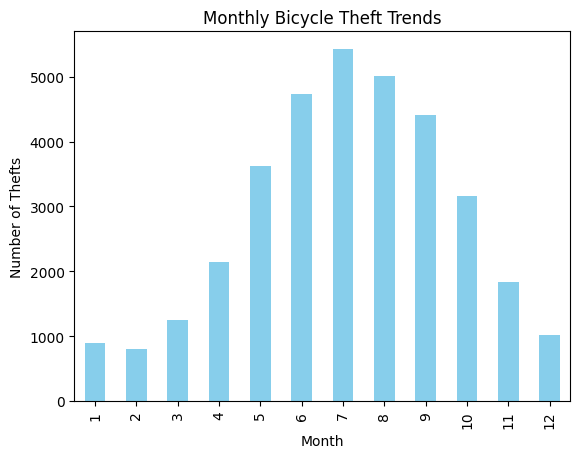

In [ ]:
seasonal_trends = df.groupby('OCC_MONTH').size()
seasonal_trends.plot(kind='bar', color='skyblue')
plt.title('Monthly Bicycle Theft Trends')
plt.xlabel('Month')
plt.ylabel('Number of Thefts')
plt.show()

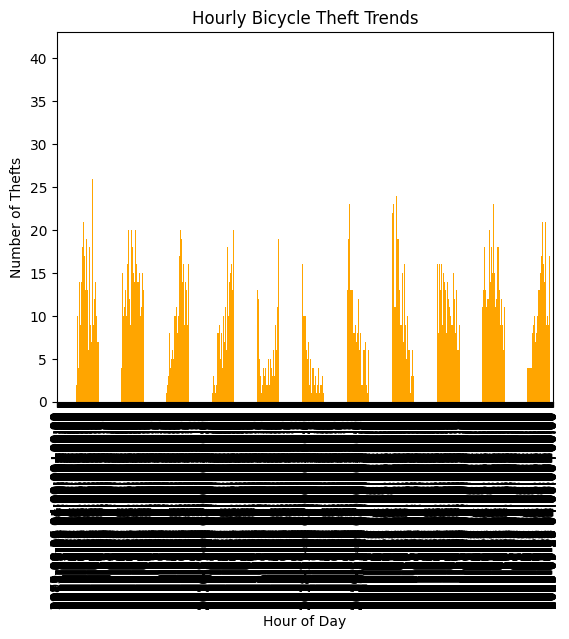

In [ ]:
time_of_day_trends = df.groupby('OCC_DATE').size()
time_of_day_trends.plot(kind='bar', color='orange')
plt.title('Hourly Bicycle Theft Trends')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Thefts')
plt.show()

In [ ]:
geometry = [Point(xy) for xy in zip(df['LONG_WGS84'], df['LAT_WGS84'])]
geo_df = gpd.GeoDataFrame(df, geometry=geometry)

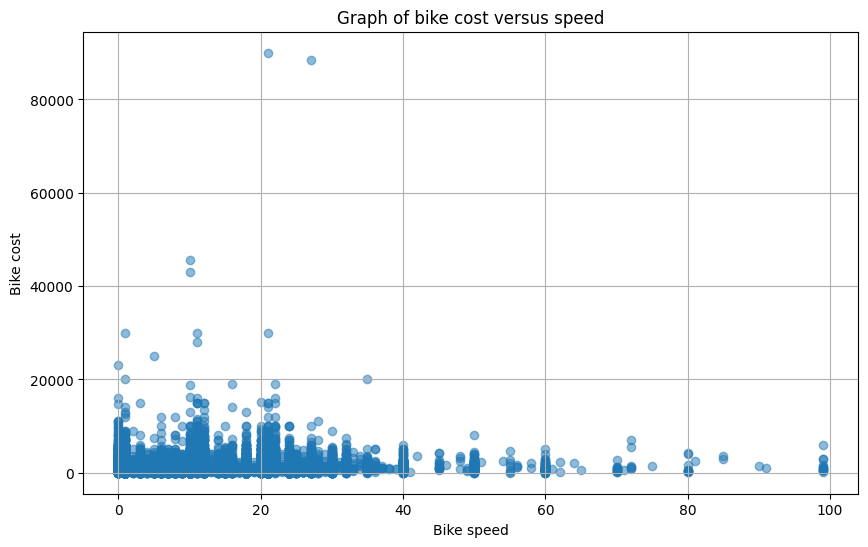

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(df['BIKE_SPEED'], df['BIKE_COST'], alpha=0.5)
plt.title('Graph of bike cost versus speed')
plt.xlabel('Bike speed')
plt.ylabel('Bike cost')
plt.grid(True)
plt.show()

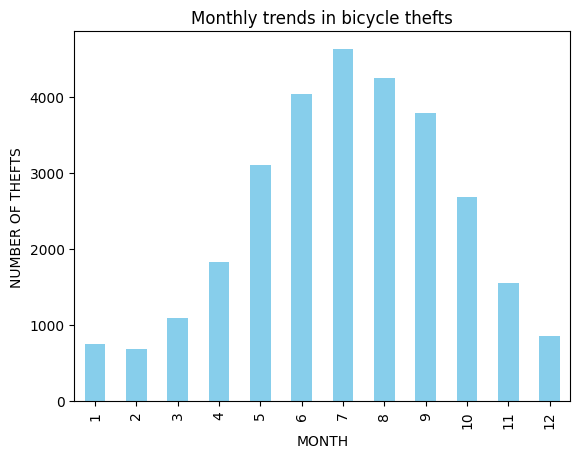

In [ ]:
df['OCC_DATE'] = pd.to_datetime(df['OCC_DATE'])

df['OCC_MONTH'] = df['OCC_DATE'].dt.month
df['Hour'] = df['OCC_DATE'].dt.hour

monthly_trends = df.groupby('OCC_MONTH').size()
monthly_trends.plot(kind='bar', color='skyblue')
plt.title('Monthly trends in bicycle thefts')
plt.xlabel('MONTH')
plt.ylabel('NUMBER OF THEFTS')
plt.show()



In [ ]:
city_column = 'NEIGHBOURHOOD_158'

city_counts = df[city_column].value_counts()

for city, count in city_counts.items():
    print(f"{city}: {count} ")

Yonge-Bay Corridor: 1784 
Downtown Yonge East: 1283 
Wellington Place: 1120 
St Lawrence-East Bayfront-The Islands: 1098 
Annex: 1022 
Kensington-Chinatown: 958 
Moss Park: 880 
Church-Wellesley: 862 
Harbourfront-CityPlace: 860 
University: 822 
South Riverdale: 804 
Bay-Cloverhill: 639 
Fort York-Liberty Village: 592 
Rosedale-Moore Park: 508 
West Queen West: 494 
Cabbagetown-South St.James Town: 474 
Trinity-Bellwoods: 454 
Palmerston-Little Italy: 431 
Junction-Wallace Emerson: 421 
North St.James Town: 402 
Little Portugal: 400 
High Park North: 366 
Roncesvalles: 356 
East End-Danforth: 351 
Dufferin Grove: 329 
The Beaches: 317 
South Eglinton-Davisville: 315 
South Parkdale: 308 
Humber Bay Shores: 281 
Dovercourt Village: 278 
Greenwood-Coxwell: 271 
NSA: 270 
North Riverdale: 254 
High Park-Swansea: 250 
Regent Park: 243 
Leaside-Bennington: 225 
York University Heights: 221 
Danforth: 211 
Humewood-Cedarvale: 188 
Mount Pleasant East: 180 
Junction Area: 178 
Wychwood: 171 

In [ ]:
most_common_city = city_counts.idxmax()
most_common_count = city_counts.max()
print(f"Most common city: {most_common_city}, number of thefts : {most_common_count}")

least_common_city = city_counts.idxmin()
least_common_count = city_counts.min()
print(f"The most rare city: {least_common_city}, number of thefts: {least_common_count}")

Most common city: Yonge-Bay Corridor, number of thefts : 1784
The most rare city: Maple Leaf, number of thefts: 6


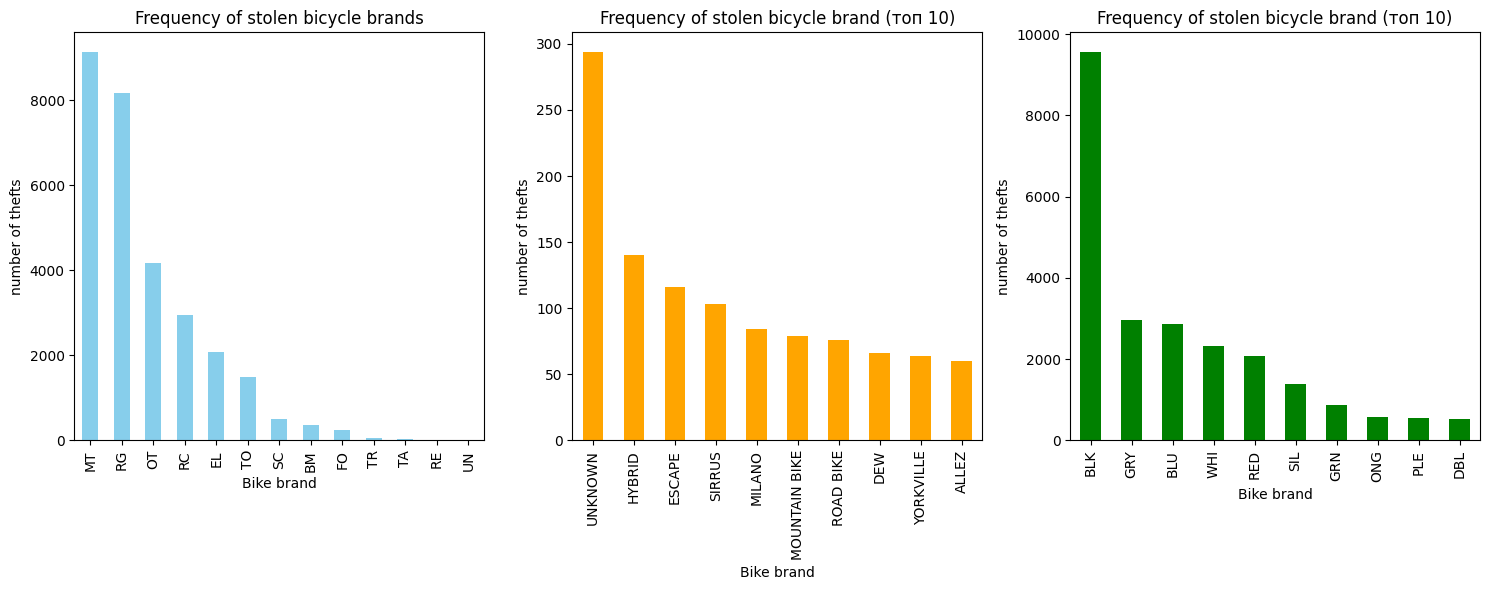

In [ ]:
brand_column = 'BIKE_TYPE'
model_column = 'BIKE_MODEL'
color_column = 'BIKE_COLOUR'

brand_counts = df[brand_column].value_counts()

model_counts = df[model_column].value_counts()

color_counts = df[color_column].value_counts()

plt.figure(figsize=(15, 6))

plt.subplot(131)
brand_counts.plot(kind='bar', color='skyblue')
plt.title('Frequency of stolen bicycle brands')
plt.xlabel('Bike brand')
plt.ylabel('number of thefts')

plt.subplot(132)
model_counts.head(10).plot(kind='bar', color='orange')
plt.title('Frequency of stolen bicycle brand (топ 10)')
plt.xlabel('Bike brand')
plt.ylabel('number of thefts')

plt.subplot(133)
color_counts.head(10).plot(kind='bar', color='green')
plt.title('Frequency of stolen bicycle brand (топ 10)')
plt.xlabel('Bike brand')
plt.ylabel('number of thefts')

plt.tight_layout()
plt.show()

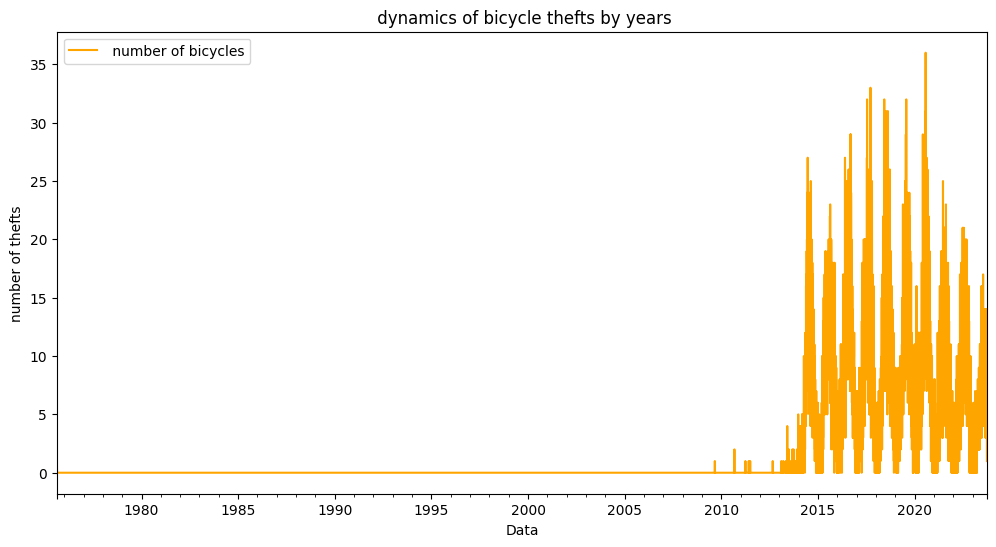

In [ ]:
date_column = 'OCC_DATE'


df[date_column] = pd.to_datetime(df[date_column])

theft_count_by_day = df.resample('D', on=date_column).size()

plt.figure(figsize=(12, 6))
theft_count_by_day.plot(label=' number of bicycles', color='orange')
plt.title(' dynamics of bicycle thefts by years')
plt.xlabel('Data')
plt.ylabel('number of thefts')
plt.legend()
plt.show()


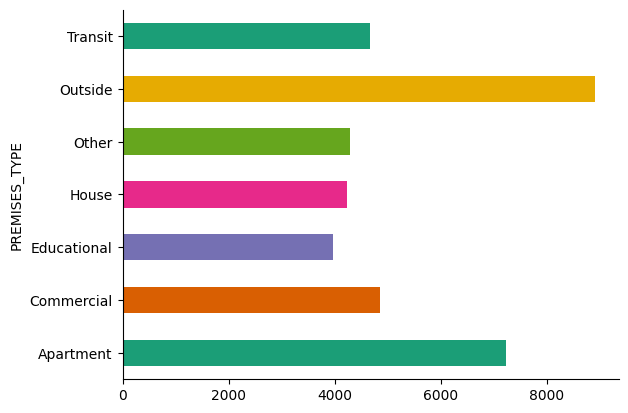

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('REPORT_DOW').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('OCC_DOW').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('PREMISES_TYPE').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

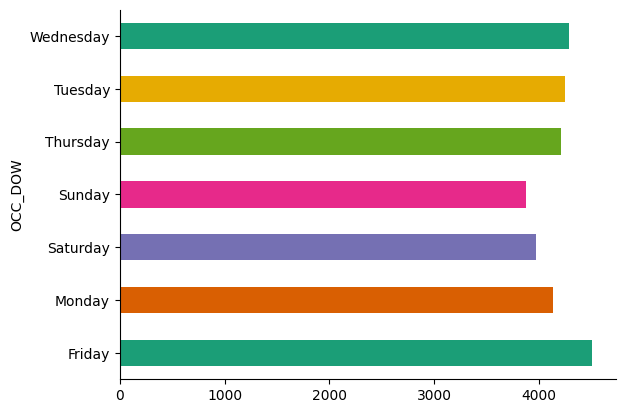

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('OCC_DOW').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)



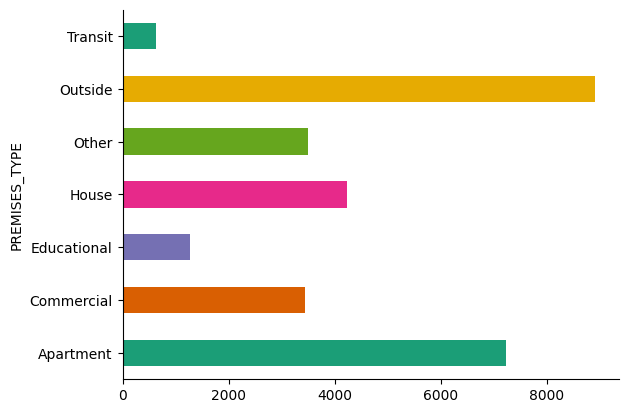

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('PREMISES_TYPE').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

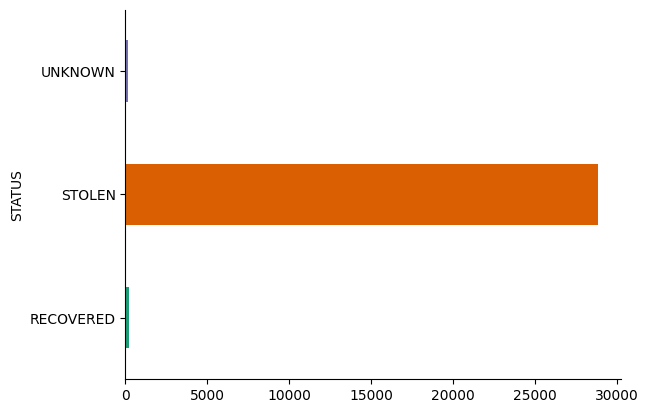

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('STATUS').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

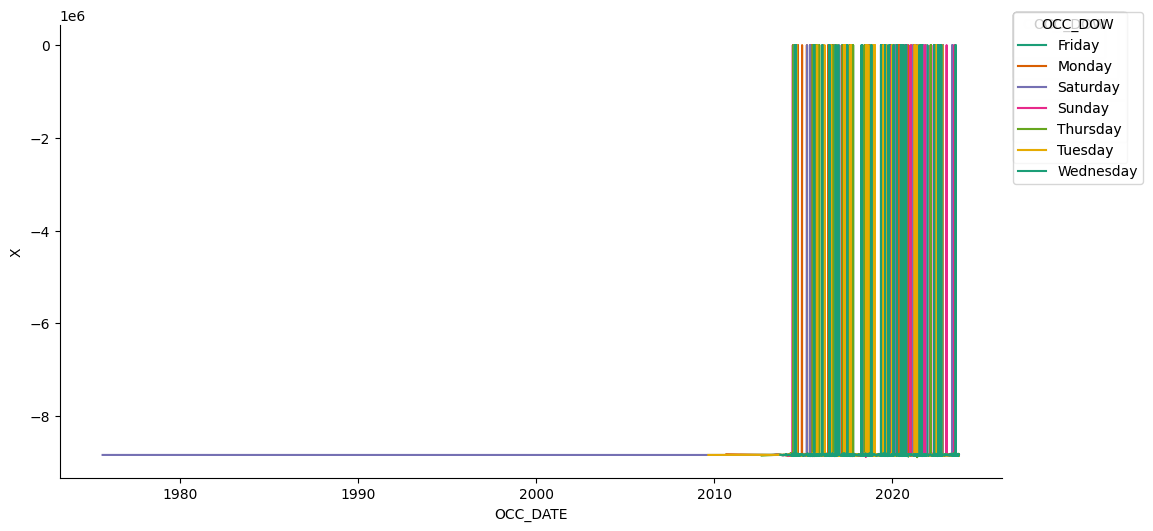

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['OCC_DATE']
  ys = series['X']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('OCC_DATE', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('OCC_DOW')):
  _plot_series(series, series_name, i)
  fig.legend(title='OCC_DOW', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('OCC_DATE')
_ = plt.ylabel('X')

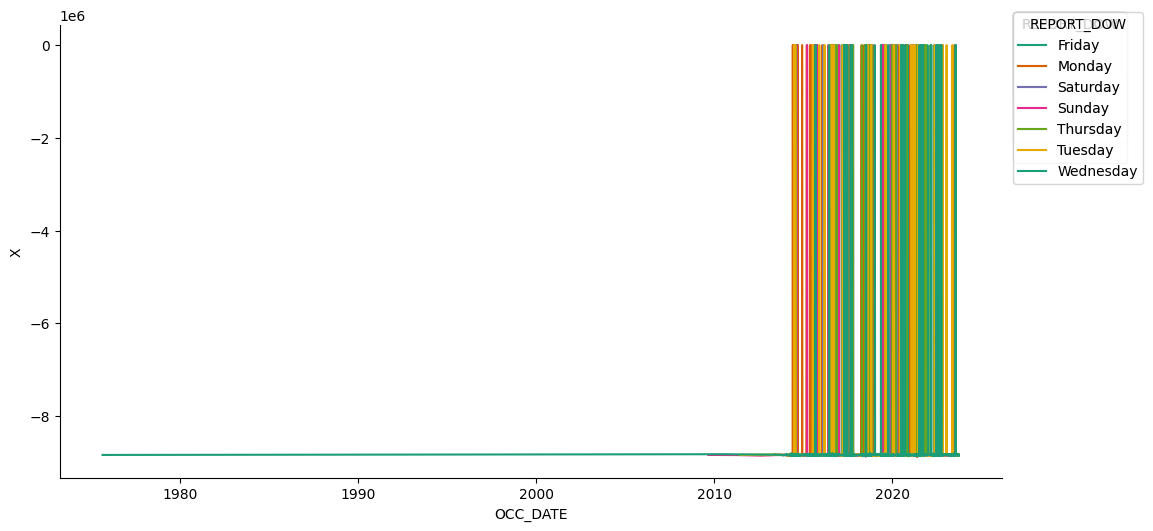

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['OCC_DATE']
  ys = series['X']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('OCC_DATE', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('REPORT_DOW')):
  _plot_series(series, series_name, i)
  fig.legend(title='REPORT_DOW', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('OCC_DATE')
_ = plt.ylabel('X')

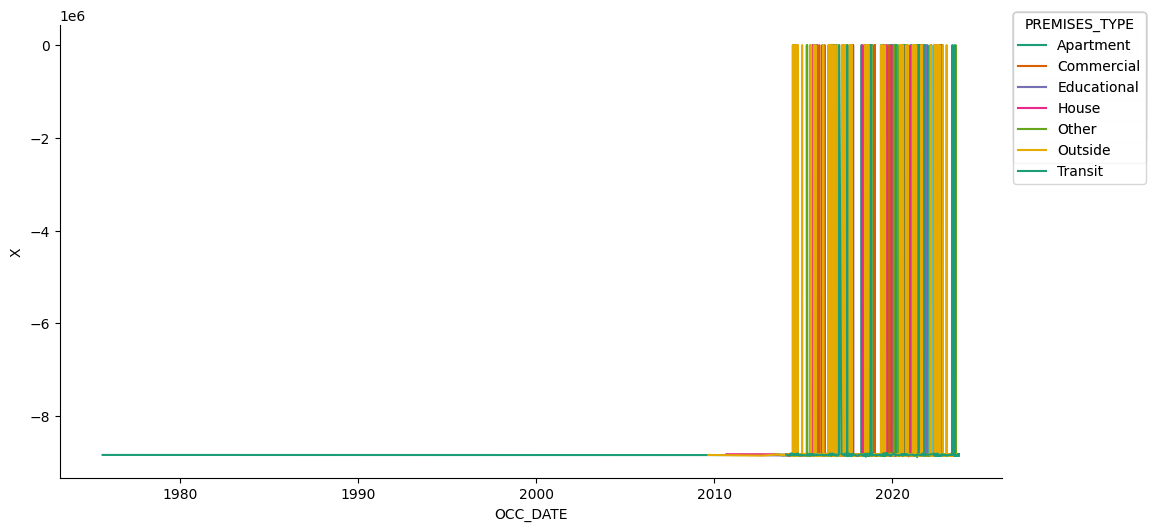

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['OCC_DATE']
  ys = series['X']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('OCC_DATE', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('PREMISES_TYPE')):
  _plot_series(series, series_name, i)
  fig.legend(title='PREMISES_TYPE', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('OCC_DATE')
_ = plt.ylabel('X')